In [5]:
import gaussian_process, covariance_functions, acquisition_functions, bayesian_optimization, sys, datasets
import numpy as np
import scipy.interpolate
import matplotlib.pyplot as p
%matplotlib inline
    
#parameters random dataset
dim = 5
low = 0
amplitude=100
step=dim * 10
no = 20
window = 4
factor = 10 * 2
s = 1
seed = 123456

#load...
data, X_range, X, Y, Z, is_true, goal_func = datasets.load_data('random_2d_data_large_area_50.csv')
#....or create
#data, X_range, X, Y, Z, is_true, goal_func = datasets.ranDataCreate(step, no, window, dim, low, factor, s, amplitude, seed, save=0)

#parameters gaussian process
dimensions = 2
noise = 1
cov_func = covariance_functions.gaussian_kernel
cov_grad = covariance_functions.gaussian_kernel_gradient
width = 25 #2.5
amp = 140  #40

#parameters bayesian optimization
iterations = 50
acqui_func = acquisition_functions.get_function("TS")
aa = acquisition_functions.ACQUI(X_range, acqui_func, mode='prob', thres=8, goal_shape=(step, step))
acqui_func = aa.get()
bounds = [(None, None), (None, None), (0.01,None)]

#initialize gaussian process
gp = gaussian_process.GP_Regressor(dimensions, noise, cov_func, cov_grad, [width, amp])
#execute bayesian optimization
gp, gp_list, s_list, hp_list = bayesian_optimization.bayesian_optimization(
    gp, 
    iterations, 
    goal_func, 
    acqui_func, 
    X_range, 
    bounds, 
    save_every=3,
    start_opt=5)

don't go here! often

========================Iteration 0 =======================
	 time: 0.782145023346

========================Iteration 1 =======================
	 time: 0.848251104355

========================Iteration 2 =======================
	 time: 1.09843587875
Saving interation 3

========================Iteration 3 =======================
	 time: 0.922798156738

========================Iteration 4 =======================
	 time: 1.23033690453

========================Iteration 5 =======================
	 time: 1.77020215988
	HP Optimization:
		before: width= 25 - amp= 140 - noise= 1
lllllllllllllllllllllll
		after: width= 9.26241036738 - amp= 25.5345797271 - noise= 2.55277264351
Saving interation 6

========================Iteration 6 =======================
	 time: 1.19725894928
	HP Optimization:
		before: width= 9.26241036738 - amp= 25.5345797271 - noise= 2.55277264351
lllllllllllllllllllllll
		after: width= 4.63222474423 - amp= 23.8560156522 - noise= 2.38379978713

=====

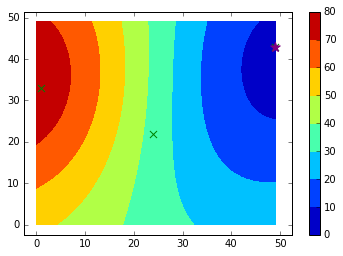

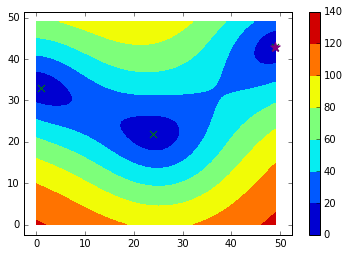

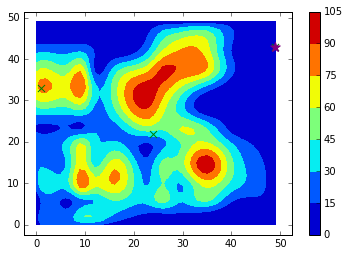

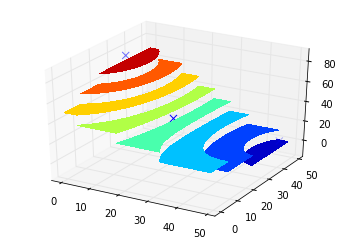

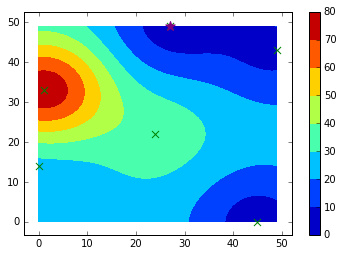

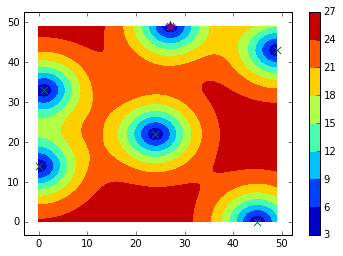

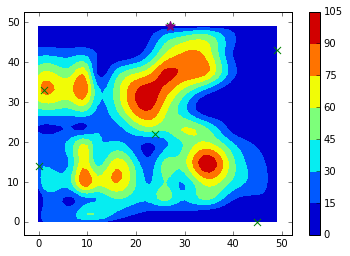

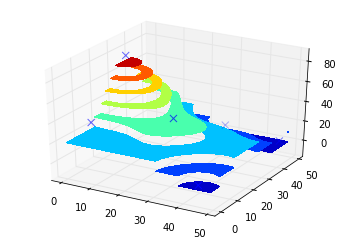

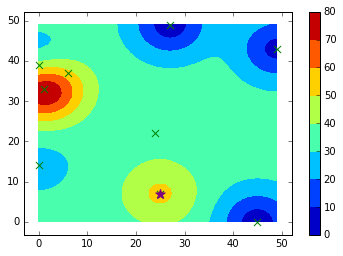

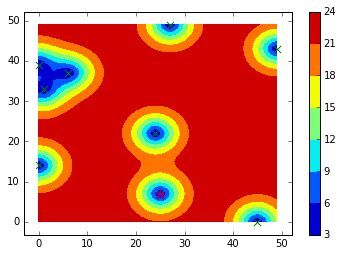

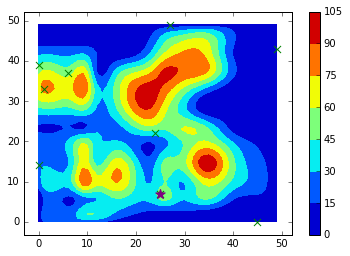

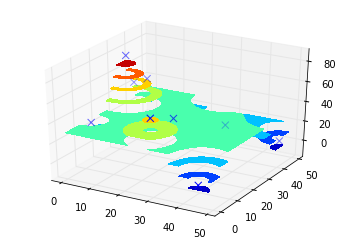

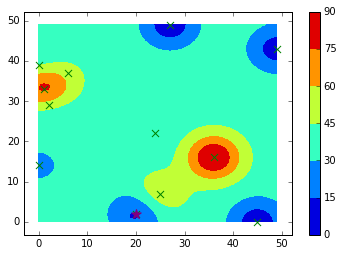

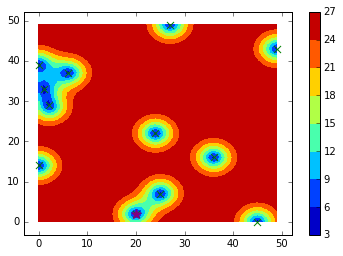

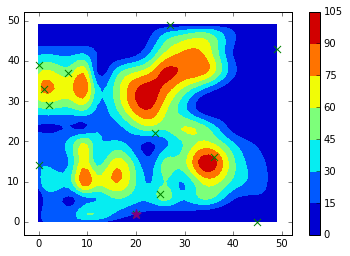

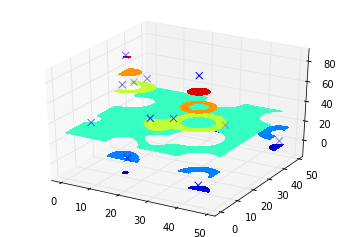

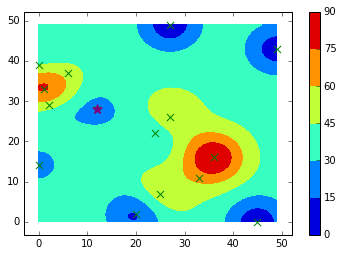

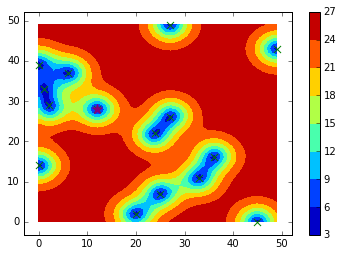

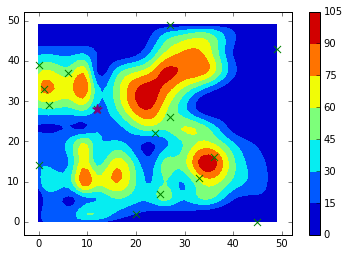

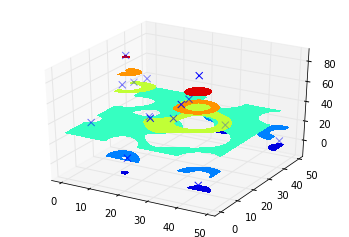

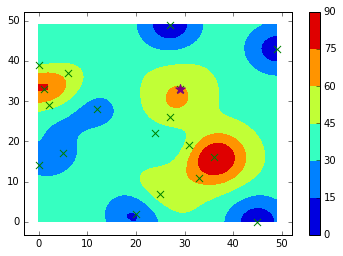

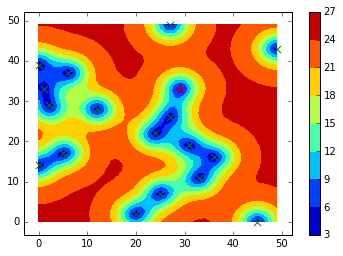

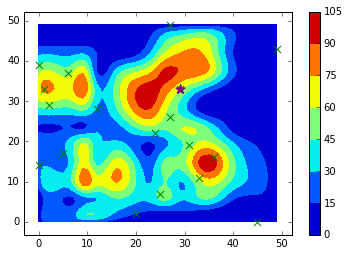

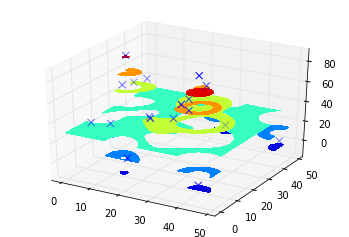

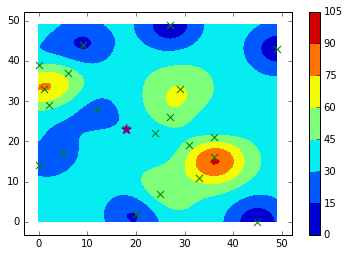

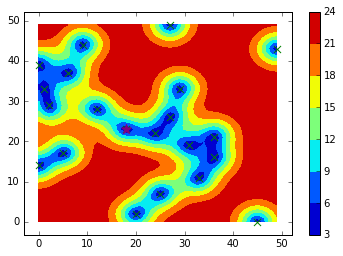

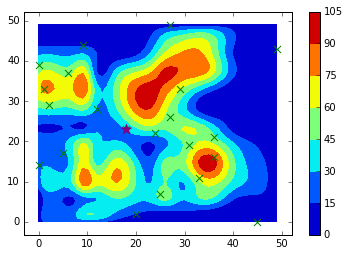

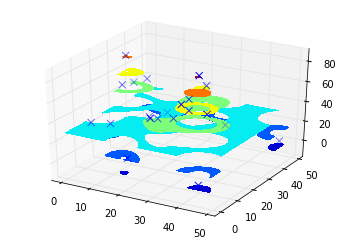

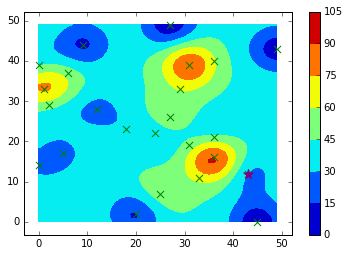

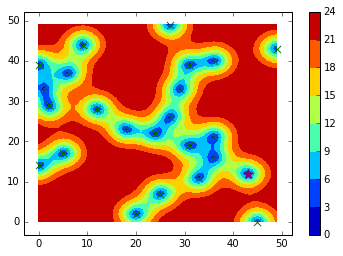

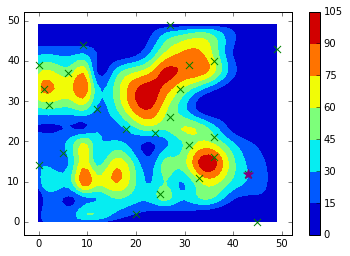

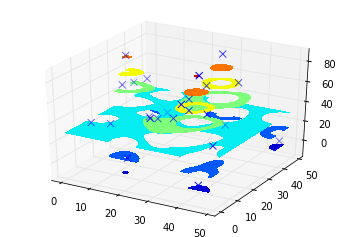

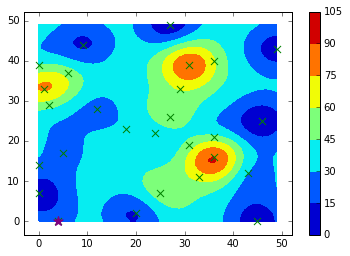

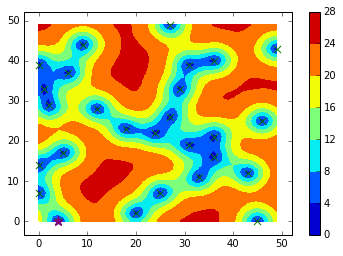

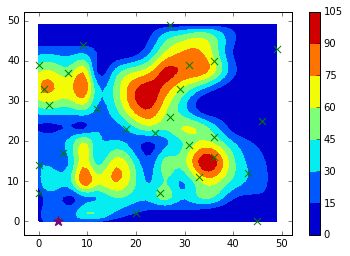

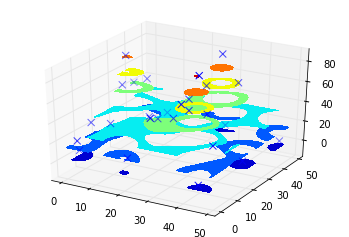

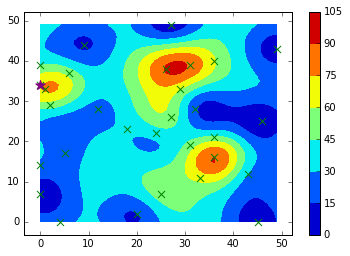

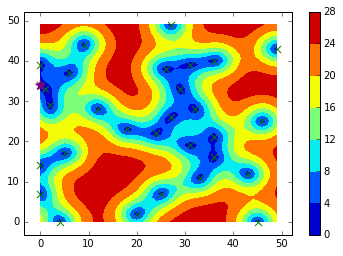

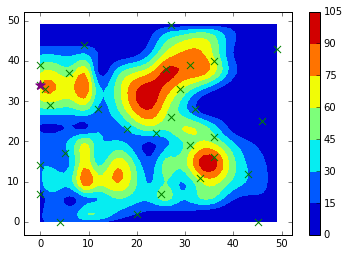

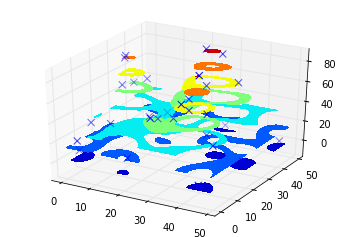

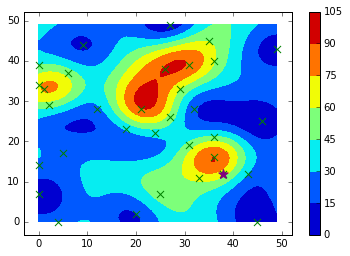

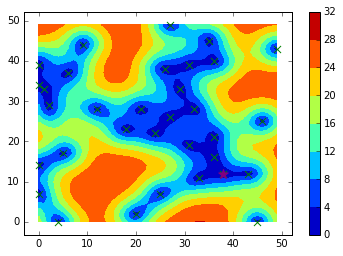

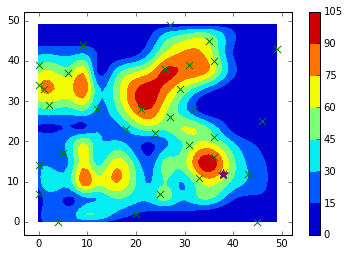

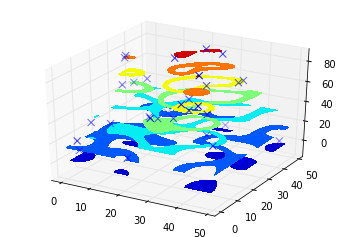

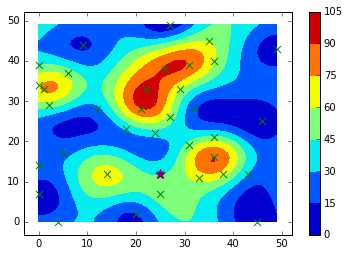

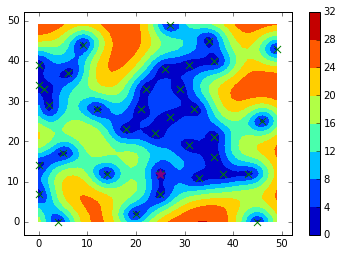

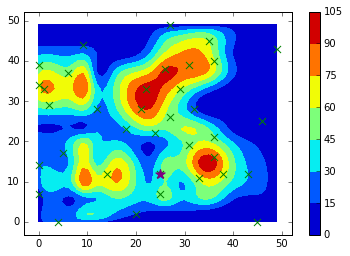

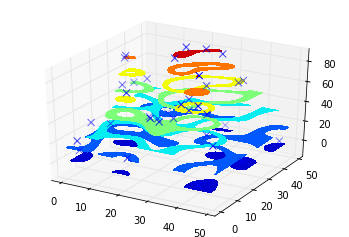

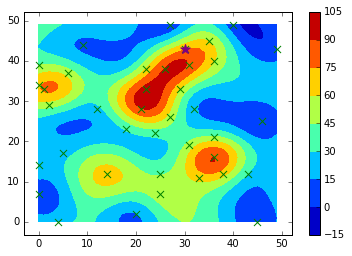

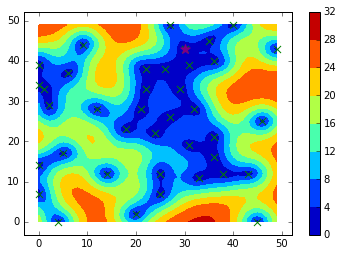

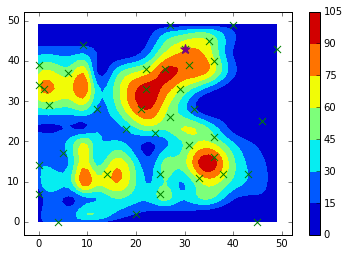

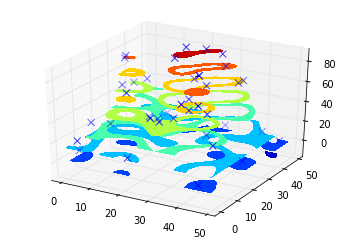

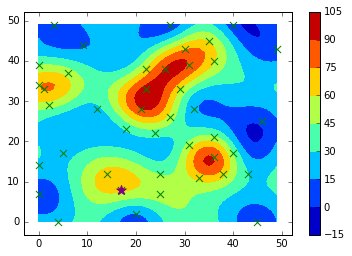

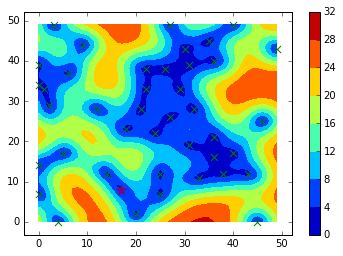

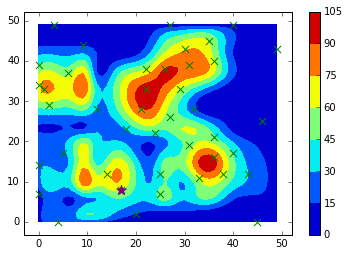

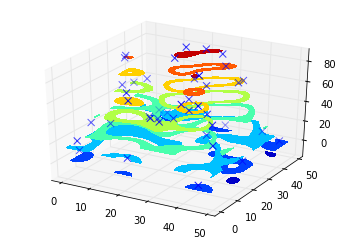

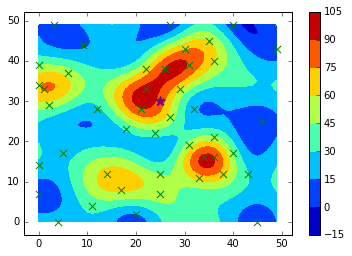

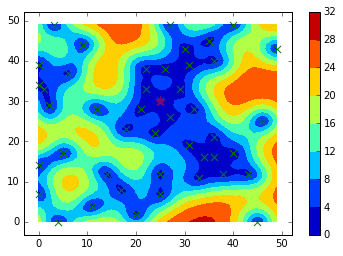

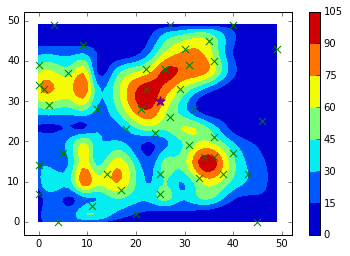

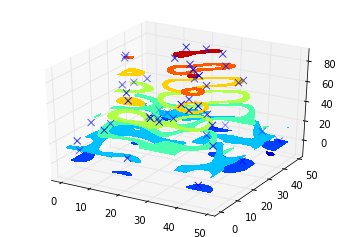

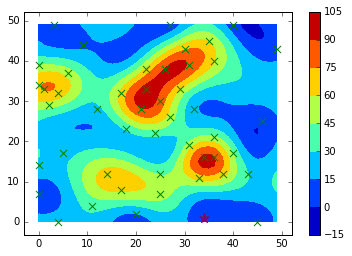

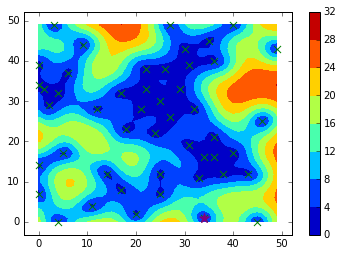

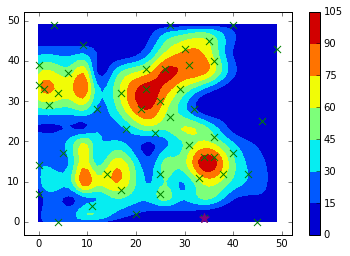

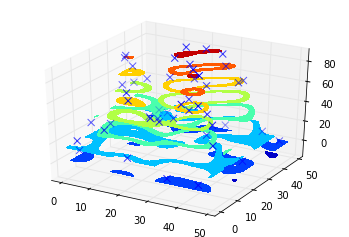

In [6]:
from mpl_toolkits.mplot3d import Axes3D 
from matplotlib import cm

h, w = X_range.shape
for i in range(len(gp_list)):

    gpi = gp_list[i]
    X_new, Y_new = s_list[i]
    mean = np.zeros((X_range.shape[0], 1))
    var = np.zeros((X_range.shape[0], 1))
    for j in range(X_range.shape[0]):
        mean[j], var[j] = gpi.predict(X_range[j, :][np.newaxis, :])
   
    z = mean.reshape(len(X), len(X))
    p.contourf(X,Y,z)                  # GP mean
    p.colorbar()
    p.scatter(gpi.Xtrain[:,0],gpi.Xtrain[:,1],color='green',marker='x', s=50) # training data
    p.scatter(X_new[:,0],X_new[:,1],color='purple',marker='*', s=100)   # test data
    p.show()
    
    z = var.flatten().reshape(len(X), len(X)) ** 0.5 #var
    p.contourf(X,Y,z)    
    p.colorbar()
    p.scatter(gpi.Xtrain[:,0],gpi.Xtrain[:,1],color='green',marker='x', s=50) # training data
    p.scatter(X_new[:,0],X_new[:,1],color='purple',marker='*', s=100)   # test data
    p.show()
    
    p.contourf(X,Y,Z)     #data
    p.colorbar()
    p.scatter(gpi.Xtrain[:,0],gpi.Xtrain[:,1],color='green',marker='x', s=50) # training data
    p.scatter(X_new[:,0],X_new[:,1],color='purple',marker='*', s=100)   # test data
    p.show()
    
    z = mean.flatten().reshape(len(X), len(X))
    fig = p.figure()
    ax = fig.gca(projection='3d')
    #surf = ax.plot_surface(X,Y,Z, rstride=1, cstride=1, cmap=cm.coolwarm,
    #                   linewidth=0, antialiased=False)   
    ax.contourf(X,Y,z)
    #fig.colorbar(surf, shrink=0.5, aspect=5) 
    ax.set_zlim(-15, 90)
    #p.colorbar()
    ax.scatter(gpi.Xtrain[:,0],gpi.Xtrain[:,1], gpi.Ytrain_original, color='green',marker='x', s=50) # training data
    #p.scatter(X_new[:,0],X_new[:,1],color='purple',marker='*', s=100)   # test data
    p.show()  